In [1]:
import pandas as pd 
import numpy as np

In [4]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_parquet("/workspaces/nyc-trip-duration/datasets/green_tripdata_2021-01.parquet")

In [11]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [12]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

df = df[(df.duration >=1) &(df.duration<=60)]

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [13]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

9.838799799829577

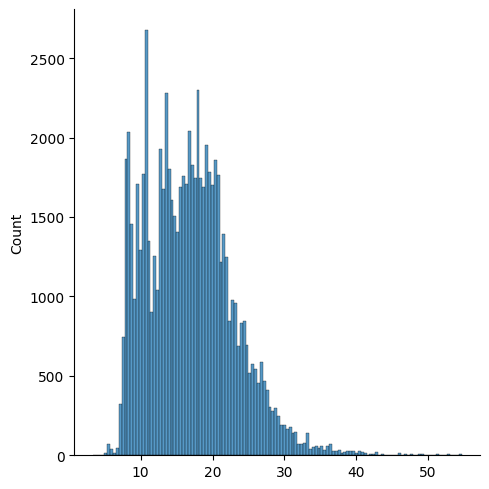

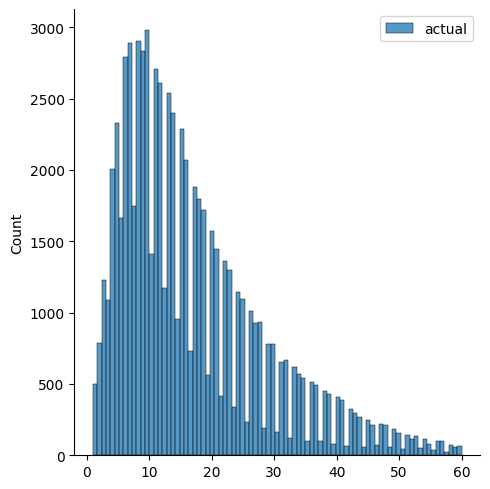

In [14]:
sns.displot(y_pred, label='prediction')
sns.displot(y_train, label='actual')

plt.legend()